<a href="https://colab.research.google.com/github/Code-tanisha/Data-Science-Python/blob/master/(CR)Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

In [24]:
import matplotlib.pyplot as plt
import numpy as np
# Sklearn also gives us pre existing datasets
from sklearn import datasets, linear_model

In [25]:
#We are going to use here pre existing dataset provided by sklearn ie diabeties
diabetes = datasets.load_diabetes()

In [26]:
print(diabetes.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [27]:
#TO KNOW ABOUT EACH AND EVERY FEATURE
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [28]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [29]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [30]:
# Here i wanted to take just 1 feature and 1 label to understand simple linear regression
# So to take 1 feature and 1 label we are going to do slicing 
diabetes_X = diabetes.data[:, np.newaxis, 2]
print(diabetes_X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [31]:
# We are going to divide out model in train and test and for training we are goin to take last 30 fratures and for test we are going to take start 20 features

diabetes_X_train = diabetes_X[:-30]
diabetes_X_test= diabetes_X[-20:]


In [32]:
# Now we are going to take corresponding labels of the featurs which we have taken above
diabetes_Y_train = diabetes.target[:-30]
diabetes_Y_test= diabetes.target[-20:]

In [33]:
# Now we are going to create a linear model which i have imported already from sklearn
model = linear_model.LinearRegression()
# Now i am going to fit my data into the model to get the line
model.fit(diabetes_X_train, diabetes_Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Now I am goin to test my model and predict the values and going to save it in Y_test 

diabeter_Y_predicted = model.predict(diabetes_X_test)


In [35]:
# Now we wanted to see how much our values are accurate for that the best metric is mean squared error
from sklearn.metrics import mean_squared_error
print("Mean squared error is: ", mean_squared_error(diabeter_Y_test, diabeter_Y_predicted))  # Here atributes are the actual values and the values predicted by the model

Mean squared error is:  0.0


In [36]:
# Now we are going to find out the weights and the intercepts of our model
print("weights: ", model.coef_)   # We get model weights using coef means coefficient 
print("intercept: ", model.intercept_)

weights:  [941.43097333]
intercept:  153.39713623331698


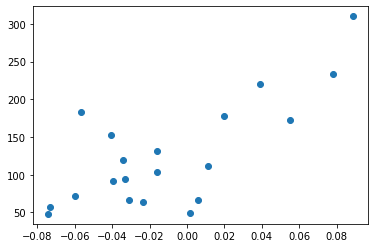

In [37]:
# Now we are going to plot our weights and intercepts with the help of maplotlib
import matplotlib.pyplot as plt
# Now 1st we are going to make out scatterplot and we are going to feed out test data
plt.scatter(diabetes_X_test, diabetes_Y_test)
plt.show()


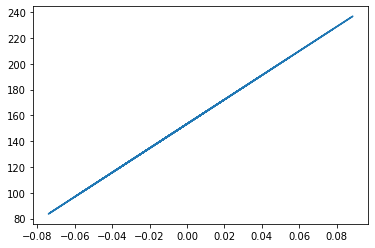

In [38]:
# Heare we want to plot the line with the predicted values
plt.plot(diabetes_X_test, diabeter_Y_predicted)
plt.show()

<function matplotlib.pyplot.show>

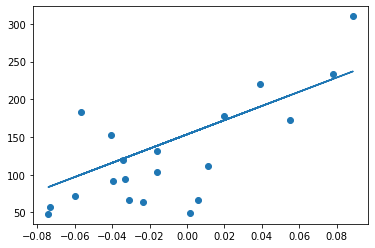

In [39]:
# now we wanted to see this line of predicted valus in out scatter plot so we will mix out above 2 plots together
plt.scatter(diabetes_X_test, diabetes_Y_test)
plt.plot(diabetes_X_test, diabeter_Y_predicted)
plt.show